# Task 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
column_names = [
    'Sex', 'Length', 'Diameter', 'Height', 
    'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'
]
data = pd.read_csv('data.csv', header=None, names=column_names)

In [4]:
s = data['Sex']
sex_category = {
    'M': 'Male',
    'F': 'Female',
    'I': 'Infant'
}
s_mapped = s.map(sex_category)
count = s_mapped.value_counts()

s_dist = count.to_frame(name='count')
total_s_count = s_dist['count'].sum()

s_dist['%'] = (s_dist['count'] / total_s_count * 100).round(2)

s_dist

,count,%
Sex,,
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [5]:
stats = data.describe(include='number')

stats.T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,mean,std,min,25%,50%,75%,max
Length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole_weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked_weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera_weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell_weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


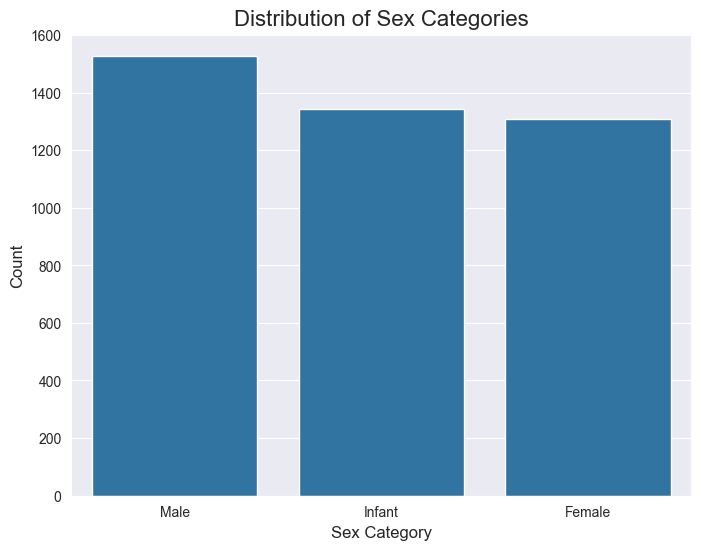

In [6]:
plt.figure(figsize=(8, 6))

barchart = sns.barplot(x=s_dist.index, y=count, data=s_dist)

barchart.set_title('Distribution of Sex Categories', fontsize=16)
barchart.set_xlabel('Sex Category', fontsize=12)
barchart.set_ylabel('Count', fontsize=12)

plt.show()

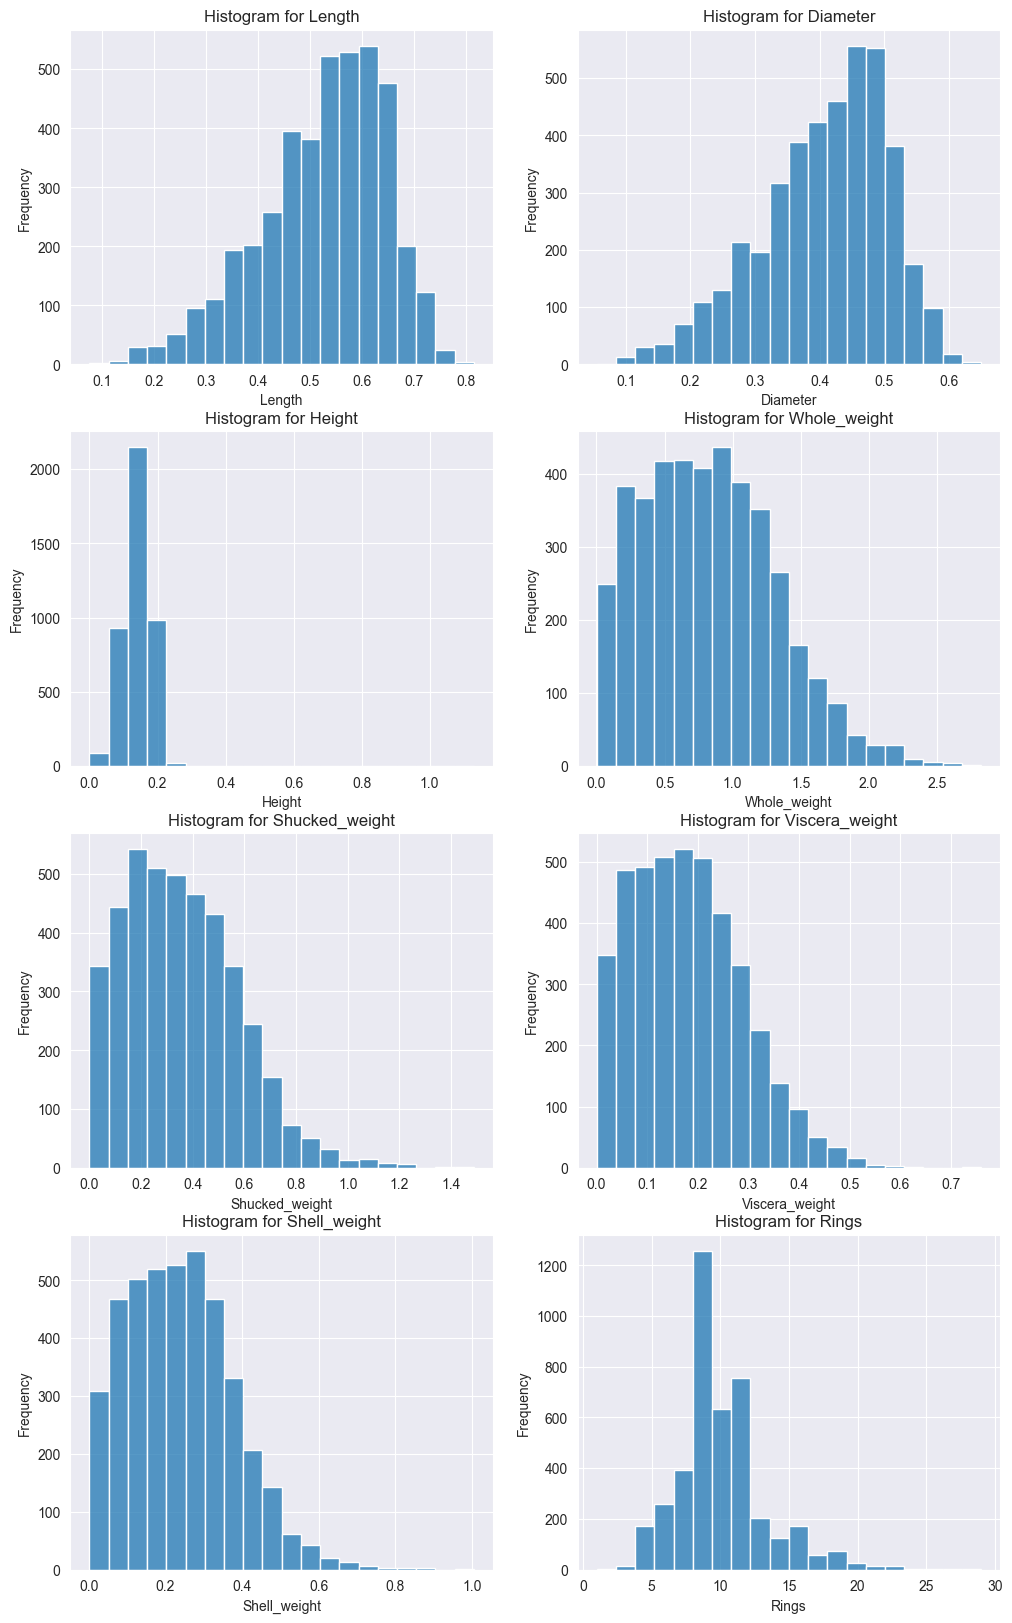

In [11]:
quantitative_vars = data.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
axes_flat = axes.flatten()

for i, col in enumerate(quantitative_vars):
    ax = axes_flat[i]
    
    sns.histplot(data=data, x=col, kde=False, ax=ax, bins=20)
    
    ax.set_title(f'Histogram for {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.show()